In [1]:
import numpy as np
import matplotlib.pyplot as plt
import L1_Norm_TTD_AltConvPro
import TTD
import utils
import numpy as np
from copy import deepcopy

# $\text{Comparative Analysis}$

## $\text{Experiment 1: Outlier Analysis and Sparsity - Tensor Case}$

In [13]:
# np.random.seed(0)
# Size of tensor
size = (10, 30, 20)
# Generate random tensor
X = np.random.randint(10, 20, size)
# Fraction of outliers as compared to total number of entries in the tensor
f_num_out = [0, 0.1, 0.2, 0.3]
num_out = [int(f * np.prod(size)) for f in f_num_out]

# TT-Ranks
r = [1]
for i in range(len(size)):
    temp = utils.MATLAB_reshape(X, (np.prod(size[:i+1]), -1))
    r.append(np.linalg.matrix_rank(temp))
compression = False

# Reducing TT-Ranks (new_rank = comp_rat * TT_rank)
# Comment this block to use original TT-Ranks
comp_rat = 0.3
for i in range(1, len(r)-1):
    r[i] = int(comp_rat * r[i])
compression = True
assert all([r[i] >= 1 for i in range(1, len(r)-1)])

# Print General Information
print(f"\nTensor Size: {size}")
print(f"TT-Ranks: {r}")
print(F"Number of Entries in Original Tensor: {np.prod(size)}")
print(f"Total Number of Entries in TT-Cores after Compression: {np.sum([r[i] * r[i+1] * size[i] for i in range(len(size))])}" if compression else f"Total Number of Entries in TT-Cores: {np.sum([r[i] * r[i+1] * size[i] for i in range(len(size))])}")
print(f"Frobenius Norm of Original Tensor: {np.linalg.norm(X)}")

# Run for different number of outliers
for iter, num in enumerate(num_out):
    print(f"\n         Number of outliers (frac = {f_num_out[iter]}): {num}\n")

    # X_hat = corrupted tensor with outliers 
    X_hat = deepcopy(X)

    # Add outliers uniformly at random
    if num != 0:
        f_indices = np.random.randint(0, np.prod(size), num)
        for i in f_indices:
            X_hat[np.unravel_index(i, size)] = np.random.randint(100, 200) * np.random.choice([-1, 1])

    print(f"Frobenius Norm of Corrupted Tensor: {np.linalg.norm(X_hat)}")
    # L1_Norm_TTD_AltConvPro
    print("\n############ L1_Norm_TTD_AltConvPro ############\n")
    G, losses, t = L1_Norm_TTD_AltConvPro.L1_TTD_AltConvPro(X_hat, ranks=r)
    print(f"Reconstruction Error (corrupted tensor):    {np.linalg.norm(X_hat - L1_Norm_TTD_AltConvPro.TTD_reconstruct(G))}")
    print(f"Reconstruction Error (uncorrupted tensor):  {np.linalg.norm(X - L1_Norm_TTD_AltConvPro.TTD_reconstruct(G))}")
    print(f"Max, Min: ", max([np.max(g.ravel()) for g in G]), min([np.min(g.ravel()) for g in G]))
    print(f"Number of close-to-zero values (tol = 1e-4):    {np.sum([np.sum(np.abs(g.ravel()) < 1e-4) for g in G])}")
    print(f"Time: {t}s")

    # TTD
    print("\n############ L2_Norm_TTD_TTSVD ############\n")
    G_list, r1, t = TTD.TTD(X_hat, ranks=r)
    X_reconstructed = TTD.TTD_reconstruct(G_list)
    print(f"Reconstruction Error (corrupted tensor):    {np.linalg.norm(X_hat - X_reconstructed)}")
    print(f"Reconstruction Error (uncorrupted tensor):  {np.linalg.norm(X - X_reconstructed)}")
    print(f"Max, Min: ", max([np.max(g.ravel()) for g in G_list]), min([np.min(g.ravel()) for g in G_list]))
    print(f"Number of close-to-zero values (tol = 1e-4):    {np.sum([np.sum(np.abs(g.ravel()) < 1e-4) for g in G_list])}")
    print(f"Time: {t}s")


Tensor Size: (10, 30, 20)
TT-Ranks: [1, 3, 6, 1]
Number of Entries in Original Tensor: 6000
Total Number of Entries in TT-Cores after Compression: 690
Frobenius Norm of Original Tensor: 1141.606324439384

         Number of outliers (frac = 0): 0

Frobenius Norm of Corrupted Tensor: 1141.606324439384

############ L1_Norm_TTD_AltConvPro ############



 43%|████▎     | 13/30 [00:02<00:02,  5.74it/s]


Reconstruction Error (corrupted tensor):    229.9728259945765
Reconstruction Error (uncorrupted tensor):  229.9728259945765
Max, Min:  27.117391545451397 -1.3614467767275336
Number of close-to-zero values (tol = 1e-4):    31
Time: 12.396754741668701s

############ L2_Norm_TTD_TTSVD ############

Reconstruction Error (corrupted tensor):    204.65039138331073
Reconstruction Error (uncorrupted tensor):  204.65039138331073
Max, Min:  257.15171367615056 -15.864737021623041
Number of close-to-zero values (tol = 1e-4):    1
Time: 0.007938861846923828s

         Number of outliers (frac = 0.1): 600

Frobenius Norm of Corrupted Tensor: 3803.5015446296325

############ L1_Norm_TTD_AltConvPro ############



 43%|████▎     | 13/30 [00:02<00:02,  6.13it/s]


Reconstruction Error (corrupted tensor):    3605.0811900115777
Reconstruction Error (uncorrupted tensor):  907.4059602858714
Max, Min:  304.063421585921 -283.9639071136557
Number of close-to-zero values (tol = 1e-4):    11
Time: 12.063379526138306s

############ L2_Norm_TTD_TTSVD ############

Reconstruction Error (corrupted tensor):    3367.960714599613
Reconstruction Error (uncorrupted tensor):  1569.7293885190309
Max, Min:  379.2372331502098 -549.683357579967
Number of close-to-zero values (tol = 1e-4):    1
Time: 0.0s

         Number of outliers (frac = 0.2): 1200

Frobenius Norm of Corrupted Tensor: 5134.589078008094

############ L1_Norm_TTD_AltConvPro ############



 50%|█████     | 15/30 [00:02<00:02,  6.51it/s]


Reconstruction Error (corrupted tensor):    4873.7590556292835
Reconstruction Error (uncorrupted tensor):  1696.9291749616832
Max, Min:  298.5306798841285 -309.78118320887006
Number of close-to-zero values (tol = 1e-4):    6
Time: 3.810760498046875s

############ L2_Norm_TTD_TTSVD ############

Reconstruction Error (corrupted tensor):    4618.731697933965
Reconstruction Error (uncorrupted tensor):  2126.274194276305
Max, Min:  413.5448956042376 -476.21038524030735
Number of close-to-zero values (tol = 1e-4):    0
Time: 0.0s

         Number of outliers (frac = 0.3): 1800

Frobenius Norm of Corrupted Tensor: 6034.567093006755

############ L1_Norm_TTD_AltConvPro ############



 77%|███████▋  | 23/30 [00:04<00:01,  5.71it/s]

Reconstruction Error (corrupted tensor):    5786.998150738393
Reconstruction Error (uncorrupted tensor):  2146.2209519399626
Max, Min:  199.704864153442 -275.6967098314238
Number of close-to-zero values (tol = 1e-4):    6
Time: 5.5571863651275635s

############ L2_Norm_TTD_TTSVD ############

Reconstruction Error (corrupted tensor):    5467.120761179529
Reconstruction Error (uncorrupted tensor):  2643.3181123368686
Max, Min:  673.172913351325 -490.9041050278968
Number of close-to-zero values (tol = 1e-4):    0
Time: 0.0s


## $\text{Experiment 2: Outlier Analysis and Sparsity - Matrix Case}$

Number of outliers:  300


 10%|█         | 3/30 [00:00<00:07,  3.72it/s]


Number of outliers:  600


 13%|█▎        | 4/30 [00:00<00:06,  4.10it/s]


Number of outliers:  900


 17%|█▋        | 5/30 [00:01<00:05,  4.60it/s]


Number of outliers:  1200


 20%|██        | 6/30 [00:01<00:04,  4.85it/s]


Number of outliers:  1500


 33%|███▎      | 10/30 [00:01<00:03,  5.04it/s]


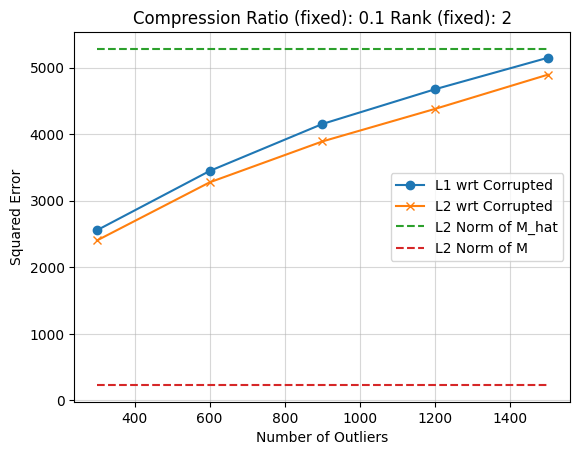

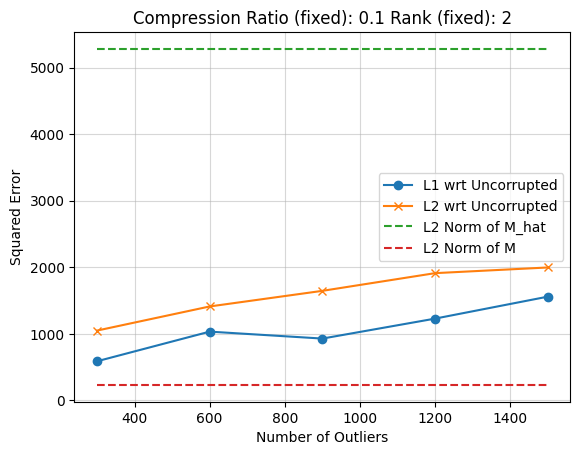

Number of outliers:  300


 33%|███▎      | 10/30 [00:02<00:05,  3.93it/s]


Number of outliers:  600


 63%|██████▎   | 19/30 [00:04<00:02,  4.21it/s]


Number of outliers:  900


 70%|███████   | 21/30 [00:04<00:01,  4.52it/s]


Number of outliers:  1200


 57%|█████▋    | 17/30 [00:03<00:02,  4.41it/s]


Number of outliers:  1500


 60%|██████    | 18/30 [00:04<00:02,  4.47it/s]


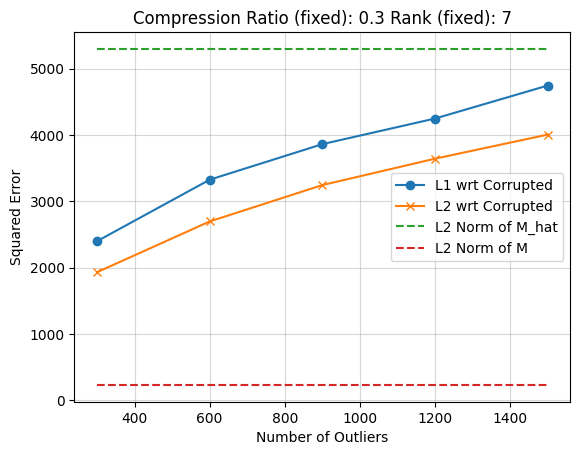

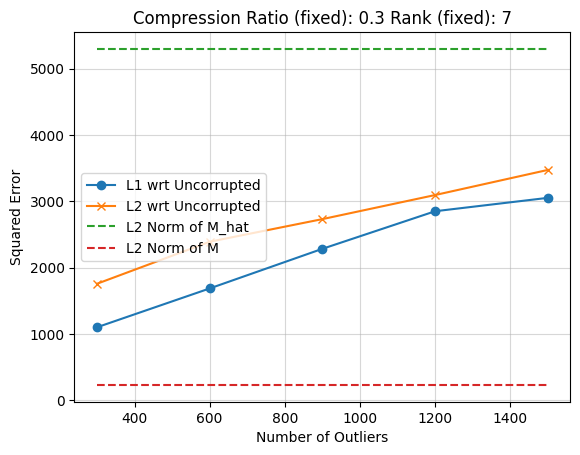

Number of outliers:  300


 33%|███▎      | 10/30 [00:02<00:05,  3.51it/s]


Number of outliers:  600


 13%|█▎        | 4/30 [00:01<00:08,  3.02it/s]


Number of outliers:  900


 37%|███▋      | 11/30 [00:02<00:04,  3.92it/s]


Number of outliers:  1200


 43%|████▎     | 13/30 [00:03<00:04,  3.98it/s]


Number of outliers:  1500


 20%|██        | 6/30 [00:01<00:06,  3.65it/s]


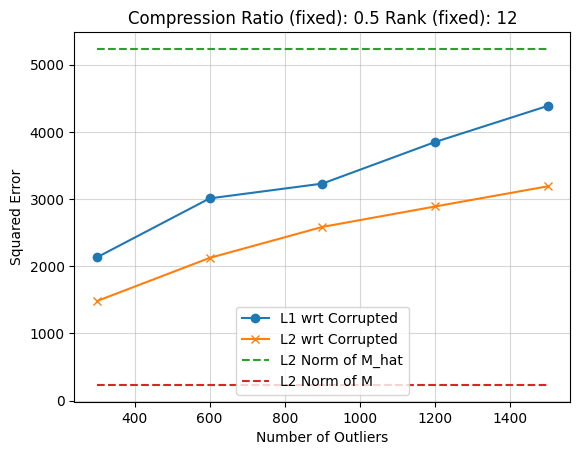

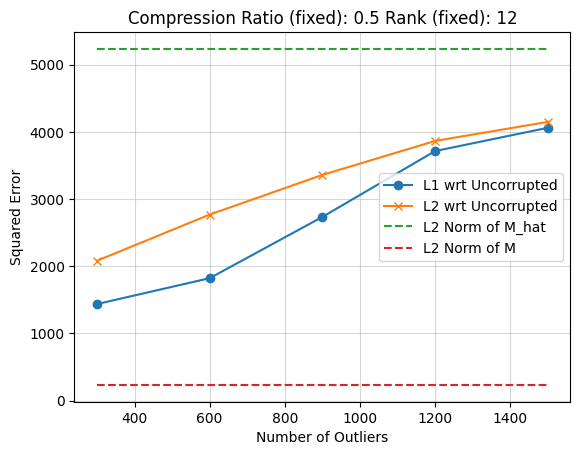

Number of outliers:  300


 47%|████▋     | 14/30 [00:03<00:04,  3.82it/s]


Number of outliers:  600


 53%|█████▎    | 16/30 [00:04<00:03,  3.77it/s]


Number of outliers:  900


 77%|███████▋  | 23/30 [00:05<00:01,  3.86it/s]


Number of outliers:  1200


 30%|███       | 9/30 [00:02<00:06,  3.47it/s]


Number of outliers:  1500


 23%|██▎       | 7/30 [00:01<00:06,  3.69it/s]


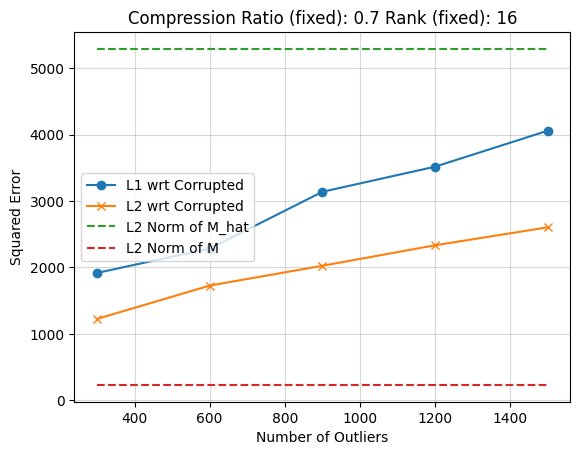

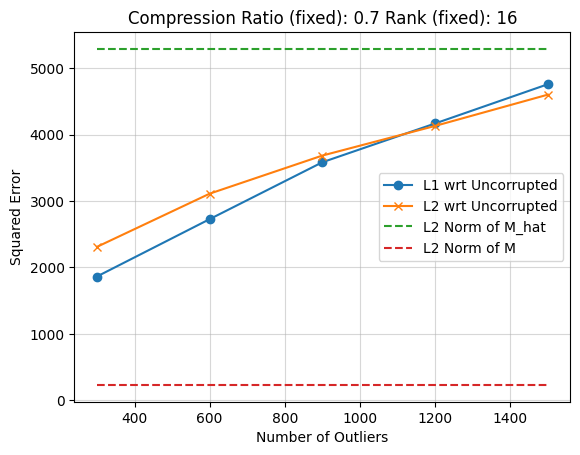

Number of outliers:  300


 30%|███       | 9/30 [00:02<00:05,  3.68it/s]


Number of outliers:  600


 20%|██        | 6/30 [00:01<00:07,  3.25it/s]


Number of outliers:  900


 27%|██▋       | 8/30 [00:02<00:06,  3.55it/s]


Number of outliers:  1200


 40%|████      | 12/30 [00:03<00:04,  3.64it/s]


Number of outliers:  1500


 43%|████▎     | 13/30 [00:03<00:04,  3.50it/s]


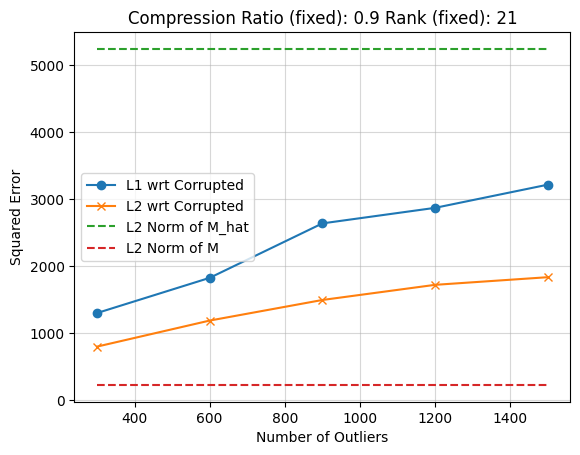

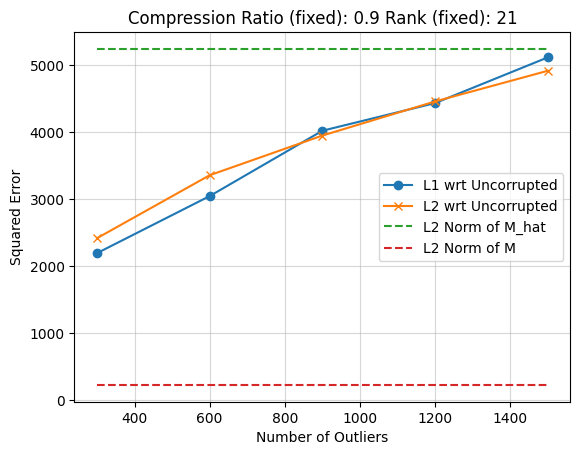

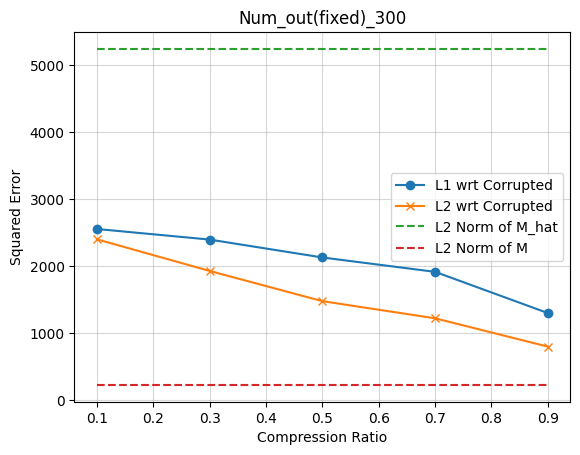

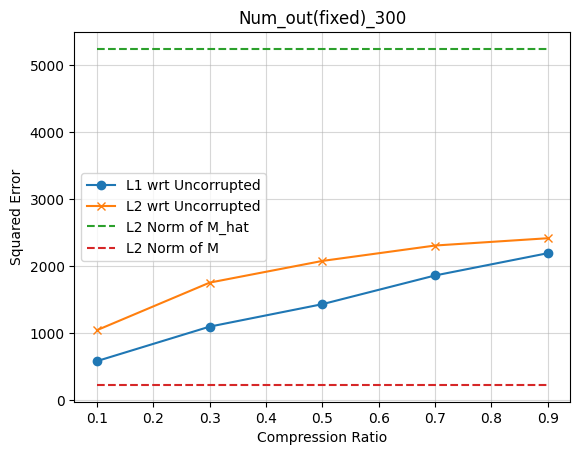

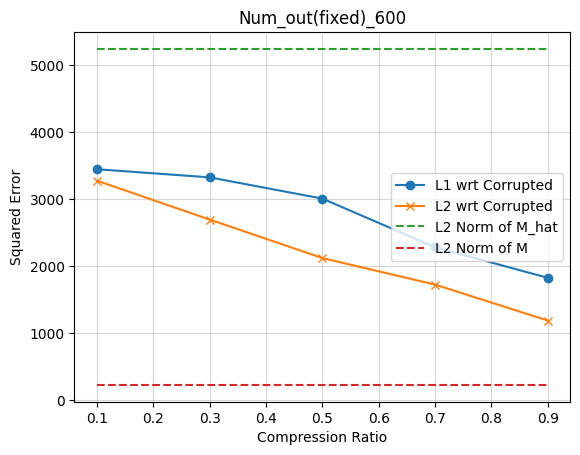

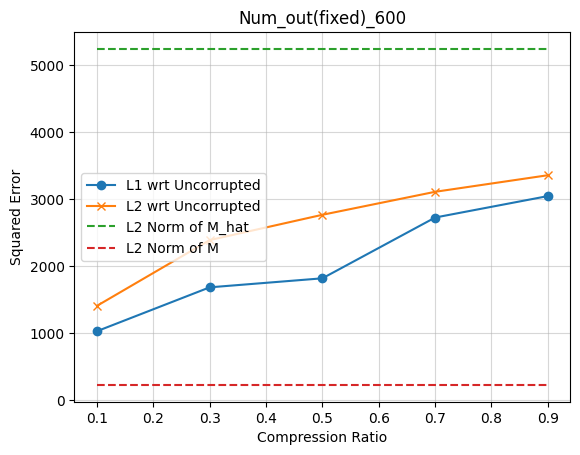

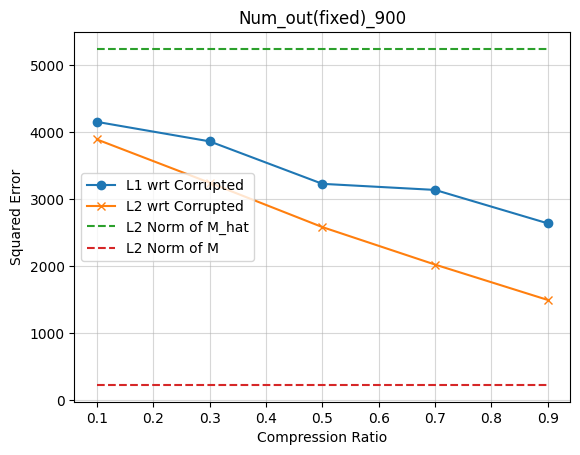

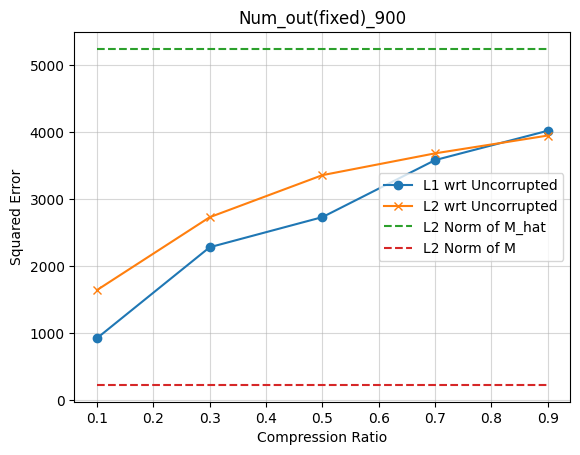

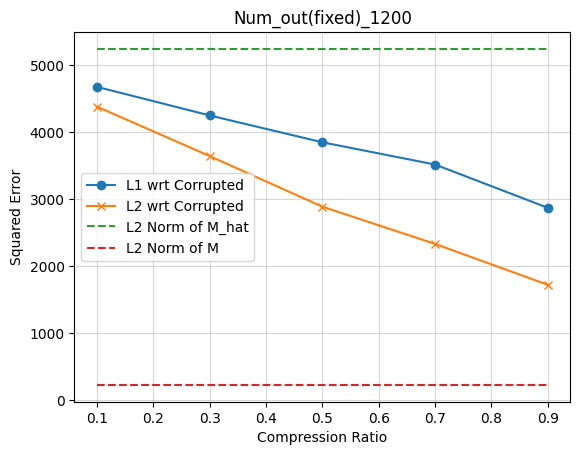

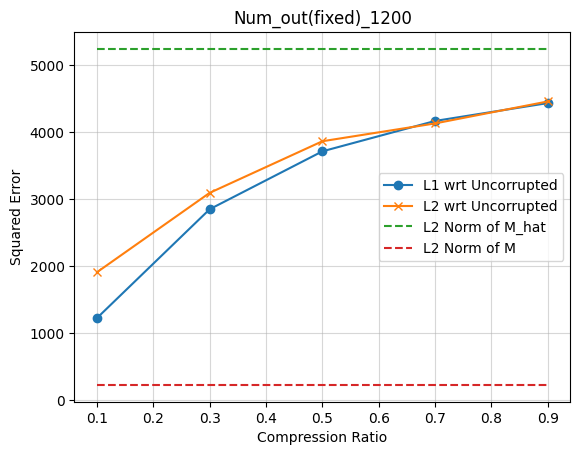

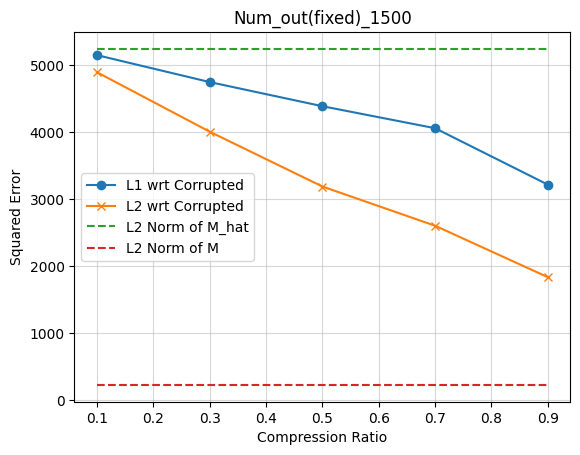

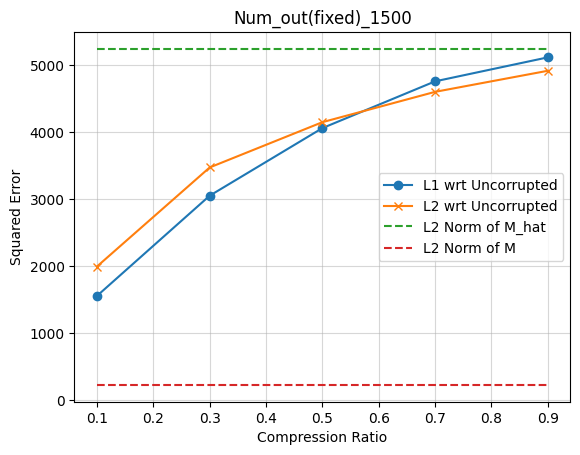

In [14]:
# np.random.seed(1)
# Size of matrix
size = (100, 30)
# Generate random matrix
M = np.random.randint(-20, 20, (100, 30))
# Compression Ratios
comp_rat = [0.1, 0.3, 0.5, 0.7, 0.9]

list_l1_err_w = []
list_l1_err_wo = []
list_l2_err_w = []
list_l2_err_wo = []

for r in comp_rat:
    # Compute rank for given compression ratio 
    rank = round((np.prod(M.shape)*r)/(M.shape[0] + M.shape[1]), 0).astype(int)
    assert rank >= 1, "Rank should be greater than or equal to 1"

    # Reduce rank of matrix
    A, S, B = np.linalg.svd(M, full_matrices = True)
    M = A[:, :rank] @ np.diag(S[:rank]) @ B[:rank, :]

    l1_err_w = []
    l1_err_wo = []
    l2_err_w = []
    l2_err_wo = []

    # Number of outliers
    num_out = [300, 600, 900, 1200, 1500]
    
    for num in num_out:
        print("Number of outliers: ", num)

        # M_hat = corrupted matrix with outliers (outliers are uniformly distributed)
        M_hat = deepcopy(M)
        f_indices = np.random.randint(0, np.prod(size), num)
        for i in f_indices:
            M_hat[np.unravel_index(i, size)] = np.random.randint(100, 200) * np.random.choice([-1, 1])
        

        # L1_Norm_TTD_AltConvPro
        U, V, losses = utils.AltConvPro_LP(M_hat, rank = rank, iterations = 30)
        X1 = U @ V.T
        l1_err_w.append(np.linalg.norm(M_hat - X1))
        l1_err_wo.append(np.linalg.norm(M - X1))

        # TTD
        X, Y, Z = np.linalg.svd(M_hat, full_matrices = False)
        X = X[:, :rank]
        Z = Z[:rank, :]
        X2 = X @ np.diag(Y[:rank]) @ Z
        l2_err_w.append(np.linalg.norm(M_hat - X2))
        l2_err_wo.append(np.linalg.norm(M - X2))

    # Plot reconstruction error vs number of outliers for fixed compression ratio and rank
    plt.figure()
    plt.title("Compression Ratio (fixed): " + str(r) + " Rank (fixed): " + str(rank))
    plt.xlabel("Number of Outliers")
    plt.ylabel("Squared Error")
    plt.plot(num_out, l1_err_w, label = "L1 wrt Corrupted", marker = 'o', linestyle = '-')
    plt.plot(num_out, l2_err_w, label = "L2 wrt Corrupted", marker = 'x', linestyle = '-')
    plt.plot(num_out, [np.linalg.norm(M_hat)]*len(num_out), label = "L2 Norm of M_hat", linestyle = '--')
    plt.plot(num_out, [np.linalg.norm(M)]*len(num_out), label = "L2 Norm of M", linestyle = '--')
    plt.grid(alpha = 0.5)
    plt.legend()
    plt.show()
    # plt.savefig(".\\plots\\outlier_analysis\\Comp_ratio(fixed)_" + str(r) + "rank(fixed)_" + str(rank) + "w.png")

    plt.figure()
    plt.title("Compression Ratio (fixed): " + str(r) + " Rank (fixed): " + str(rank))
    plt.xlabel("Number of Outliers")
    plt.ylabel("Squared Error")
    plt.plot(num_out, l1_err_wo, label = "L1 wrt Uncorrupted", marker = 'o', linestyle = '-')
    plt.plot(num_out, l2_err_wo, label = "L2 wrt Uncorrupted", marker = 'x', linestyle = '-')
    plt.plot(num_out, [np.linalg.norm(M_hat)]*len(num_out), label = "L2 Norm of M_hat", linestyle = '--')
    plt.plot(num_out, [np.linalg.norm(M)]*len(num_out), label = "L2 Norm of M", linestyle = '--')
    plt.grid(alpha = 0.5)
    plt.legend()
    plt.show()
    # plt.savefig(".\\plots\\outlier_analysis\\Comp_ratio(fixed)_" + str(r) + "rank(fixed)_" + str(rank) + "wo.png")

    list_l1_err_w.append(l1_err_w)
    list_l1_err_wo.append(l1_err_wo)
    list_l2_err_w.append(l2_err_w)
    list_l2_err_wo.append(l2_err_wo)

# Plot reconstruction error vs compression ratio for fixed number of outliers
for idx, num in enumerate(num_out):
    plt.figure()
    plt.title("Num_out(fixed)_" + str(num))
    plt.xlabel("Compression Ratio")
    plt.ylabel("Squared Error")
    plt.plot(comp_rat, [list_l1_err_w[j][idx] for j in range(len(list_l1_err_w))], label = "L1 wrt Corrupted", marker = 'o', linestyle = '-')
    plt.plot(comp_rat,  [list_l2_err_w[j][idx] for j in range(len(list_l2_err_w))], label = "L2 wrt Corrupted", marker = 'x', linestyle = '-')
    plt.plot(comp_rat, [np.linalg.norm(M_hat)]*len(comp_rat), label = "L2 Norm of M_hat", linestyle = '--')
    plt.plot(comp_rat, [np.linalg.norm(M)]*len(comp_rat), label = "L2 Norm of M", linestyle = '--')
    plt.grid(alpha = 0.5)
    plt.legend()
    plt.show()
    # plt.savefig(".\\plots\\outlier_analysis\\Num_out(fixed)_" + str(num) + "w.png")

    plt.figure()
    plt.title("Num_out(fixed)_" + str(num))
    plt.xlabel("Compression Ratio")
    plt.ylabel("Squared Error")
    plt.plot(comp_rat,  [list_l1_err_wo[j][idx] for j in range(len(list_l1_err_wo))], label = "L1 wrt Uncorrupted", marker = 'o', linestyle = '-')
    plt.plot(comp_rat,  [list_l2_err_wo[j][idx] for j in range(len(list_l2_err_wo))], label = "L2 wrt Uncorrupted", marker = 'x', linestyle = '-')
    plt.plot(comp_rat, [np.linalg.norm(M_hat)]*len(comp_rat), label = "L2 Norm of M_hat", linestyle = '--')
    plt.plot(comp_rat, [np.linalg.norm(M)]*len(comp_rat), label = "L2 Norm of M", linestyle = '--')
    plt.grid(alpha = 0.5)
    plt.legend()
    plt.show()
    # plt.savefig(".\\plots\\outlier_analysis\\Num_out(fixed)_" + str(num) + "wo.png")